In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
wnba = pd.read_csv('src/wnba-player-stats-2017.zip')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [3]:
wnba.head()
wnba.tail()
wnba.shape

parameter = wnba['Games Played'].max()

sample = wnba.sample(n=30, random_state=1)

statistic = sample['Games Played'].max()
sampling_error = parameter - statistic

print(parameter, statistic, sampling_error)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


(143, 32)

32 30 2


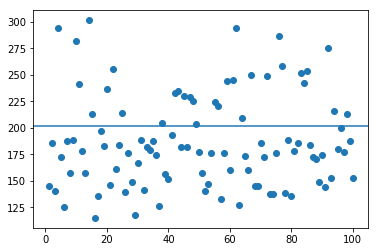

In [4]:
sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()

Which position gets the most points?

In [5]:
wnba['Pts_per_game'] = wnba['PTS']/wnba['Games Played']

# Create dictionary of data frames, each one called by the key name:
group_dict = {key: wnba.loc[value] for key, value in wnba.groupby("Pos").groups.items()}
# Export resuls of operations to new dictionary:
res_dict = {key: group_dict[key]['Pts_per_game'].sample(n=10, random_state = 0).mean() for (key, value) in group_dict.items()}

position_most_points = max(res_dict, key=res_dict.get)
print(position_most_points)

C


,Games Played,Played Range
0,8,12 or less
1,30,23 or more
2,26,23 or more
3,31,23 or more
4,24,23 or more
5,14,22 or less
6,16,22 or less
7,26,23 or more
8,30,23 or more
9,7,12 or less


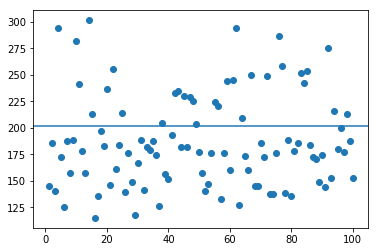

In [6]:
# Set bins based on values
wnba['Played Range'] = pd.cut(wnba['Games Played'], [0,12,22, wnba['Games Played'].max()], \
        include_lowest=False, right=True, labels=['12 or less', '22 or less', '23 or more'])
                                                                                                 
wnba[['Games Played', 'Played Range']].head(20)                                                                                              

sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()

In [11]:
for i in range(3):
    print('Outputting sample {}:'.format(i))
    print(wnba.PTS.sample(n=5, random_state=i))

Outputting sample 0:
45     376
118     81
16      31
56       9
22     238
Name: PTS, dtype: int64
Outputting sample 1:
78     207
116     87
31      54
5       26
125    398
Name: PTS, dtype: int64
Outputting sample 2:
97     191
119     96
48     252
54      13
101     96
Name: PTS, dtype: int64


In [10]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,Played Range
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,11.625000,12 or less
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,7.233333,23 or more
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,8.384615,23 or more
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,6.064516,23 or more
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,2.083333,23 or more


In [27]:
# List of dataframes
data_list = []
for i in range(100):
    df_a = wnba[wnba['Played Range'] == '23 or more'].sample(n=7, random_state=i)
    df_b = wnba[wnba['Played Range'] == '22 or less'].sample(n=2, random_state=i)
    df_c = wnba[wnba['Played Range'] == '12 or less'].sample(n=1, random_state=i)
    df_m = pd.concat([df_a, df_b, df_c])
    data_list.append(df_m)
 
# List of means
means_list = [i['PTS'].mean() for i in data_list]

[185.9, 163.6, 176.0, 305.1, 241.1, 200.1, 272.5, 170.5, 190.5, 138.4, 165.7, 214.9, 130.0, 173.6, 195.0, 148.5, 192.6, 176.5, 267.2, 208.9, 153.6, 176.3, 206.3, 118.4, 268.3, 197.1, 154.7, 294.4, 160.9, 160.8, 203.4, 188.8, 274.9, 201.7, 275.3, 235.1, 141.2, 145.5, 222.7, 187.0, 231.3, 202.0, 230.2, 289.7, 249.1, 120.4, 222.7, 225.8, 217.9, 232.7, 176.0, 197.7, 177.6, 208.8, 144.8, 279.5, 330.3, 169.3, 123.2, 172.7, 169.7, 259.9, 191.9, 239.1, 177.3, 264.2, 151.9, 176.4, 180.5, 189.0, 227.6, 225.5, 161.5, 148.8, 208.7, 173.1, 200.1, 219.7, 260.3, 169.2, 159.0, 216.7, 204.3, 245.0, 234.4, 216.1, 196.9, 201.0, 191.8, 186.7, 202.6, 155.7, 182.5, 162.6, 192.5, 203.7, 230.2, 207.1, 157.4, 196.2]


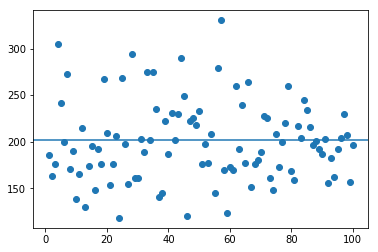

In [26]:
plt.scatter(range(1, 101), means_list)
plt.axhline(wnba.PTS.mean())
plt.show()

In [30]:
print(wnba['MIN'].value_counts(bins = 5, normalize = True))
wnba.head()
# wnba[['MIN', 'Mins_Bin']].head()

(213.2, 414.4]     0.223776
(615.6, 816.8]     0.202797
(10.993, 213.2]    0.202797
(816.8, 1018.0]    0.195804
(414.4, 615.6]     0.174825
Name: MIN, dtype: float64


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,Played Range
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,11.625000,12 or less
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,7.233333,23 or more
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,8.384615,23 or more
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,6.064516,23 or more
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,2.083333,23 or more


In [31]:
wnba['Team'].unique()

sample_teams = list(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))
print(sample_teams)

# Filter DF on multiple values
cluster = wnba.loc[wnba['Team'].isin(sample_teams)]
metrics = ['Height', 'Age', 'BMI', 'PTS']
orig_dict = wnba[metrics].mean().to_dict()
clust_dict = cluster[metrics].mean().to_dict()
print(orig_dict)
print(clust_dict)

sampling_error_height = orig_dict[metrics[0]] - clust_dict[metrics[0]]
sampling_error_age = orig_dict[metrics[1]] - clust_dict[metrics[1]]
sampling_error_BMI = orig_dict[metrics[2]] - clust_dict[metrics[2]]
sampling_error_points = orig_dict[metrics[3]] - clust_dict[metrics[3]]

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

In [72]:
print(sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points)

-0.0640012161751 -1.40133779264 0.23095444166 -27.7967467315


In [74]:
print(orig_dict[metrics[0]])
print(clust_dict['Height'])

184.566433566
184.630434783


In [75]:
print(sampling_error_height)

-0.0640012161751


In [69]:
print(clust_dict['Height'])

184.630434783
